In [6]:
# Import necessary libraries
import numpy as np #Using this for mean and median
import statistics # Using this for the mode
from scipy.stats import skew, kurtosis
from scipy import stats
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import scipy.stats as stat
from scipy.stats import poisson

# Section A 

<h3>Daily patient admissions for the past 10 days</h3>

In [ ]:

admissions = np.array([32, 28, 35, 30, 29, 27, 31, 34, 33, 30])
print(f"Data: {admissions}")

# Compute the mean, median, and mode of patient admissions.

# Calculate Mean using numpy
mean_admissions = np.mean(admissions)

# Calculate Median using numpy
median_admissions = np.median(admissions)

# Calculate Mode using statistics.mode
mode_admissions = statistics.mode(admissions)

print(f"\nCalculated Measures:")
print(f"Mean Admissions: {mean_admissions:.1f}")
print(f"Median Admissions: {median_admissions:.1f}")
print(f"Mode Admissions: {mode_admissions}")

# Determine best measure of central tendency
print("\nThe mean best represents patient admissions as the data is relatively symmetric without outliers.\n")

# Calculate effect of 10% capacity increase
increased_admissions = [x * 1.1 for x in admissions]
new_mean = statistics.mean(increased_admissions)
new_median = statistics.median(increased_admissions)
new_mode = statistics.mode(increased_admissions)  # Mode after increase is 33.0

print(f"After a 10% capacity increase:")
print(f"New Mean: {new_mean:.2f}")
print(f"New Median: {new_median:.2f}")
print(f"New Mode: {new_mode:.2f}")

<h3>Recovery duration (in days) of 10 patients</h3>

In [86]:

# Original recovery data
recovery_times = [5, 7, 6, 8, 9, 5, 6, 7, 8, 6]
print(f"Data: {recovery_days}")

# Calculate range, variance, standard deviation
data_range = np.ptp(recovery_times)
variance = np.var(recovery_times, ddof=1)  # Sample variance (ddof=1)
std_dev = np.std(recovery_times, ddof=1)

print(f"Range: {data_range} days")
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f} days\n")

mean_recovery = np.mean(recovery_days) # Calculate mean for context
print(f"Mean recovery is ({mean_recovery:.1f} days) for this group of patients.")

# Interpret standard deviation
print("A standard deviation of 1.34 days indicates that individual recovery times typically vary by about ±1.34 days from the average recovery time (6.7 days). This represents low variability, as most recovery times cluster closely around the mean.\n")

# Add new patients (4 and 10 days)
new_recovery_times = recovery_times + [4, 10]
print(f"New Data: {new_recovery_days}")
new_variance = np.var(new_recovery_times, ddof=1)
new_std_dev = np.std(new_recovery_times, ddof=1)

print(f"New Standard Deviation (after adding 4 and 10): {new_std_dev:.2f} days")
print("The standard deviation increased, indicating higher variability due to the outliers (4 and 10).")


Data: [5 7 6 8 9 5 6 7 8 6]
Range: 4 days
Variance: 1.79
Standard Deviation: 1.34 days

Mean recovery is (6.7 days) for this group of patients.
A standard deviation of 1.34 days indicates that individual recovery times typically vary by about ±1.34 days from the average recovery time (6.7 days). This represents low variability, as most recovery times cluster closely around the mean.

New Data: [ 5  7  6  8  9  5  6  7  8  6  4 10]
New Standard Deviation (after adding 4 and 10): 1.76 days
The standard deviation increased, indicating higher variability due to the outliers (4 and 10).


<h3>Patient satisfaction scores</h3>

In [28]:
scores = [8, 9, 7, 8, 10, 7, 9, 6, 10, 8, 7, 9]

# Skewness and kurtosis
skewness = skew(scores)
kurt = kurtosis(scores, fisher=False)  # Pearson’s kurtosis (not excess)
excess_kurtosis = kurt - 3

print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f} (Excess: {excess_kurtosis:.2f})")

# Interpretation
print("\nNormality Check:")
print("- Near-zero skew (-0.04) → Roughly symmetric.")
print("- Excess kurtosis (-1.01) → Lighter tails than normal.Fewer outliers than a normal distribution.\n")

print("If satisfaction scores shift higher:")
print("Skewness will likely become positive (right-skewed).")

Skewness: -0.04
Kurtosis: 1.99 (Excess: -1.01)

Normality Check:
- Near-zero skew (-0.04) → Roughly symmetric.
- Excess kurtosis (-1.01) → Lighter tails than normal.Fewer outliers than a normal distribution.

If satisfaction scores shift higher:
Skewness will likely become positive (right-skewed).


<h3>Nurse staffing level and patient recobvery time</h3>

In [40]:

nurses = np.array([10, 12, 15, 18, 20, 22])
recovery_times = np.array([8, 7, 6, 5, 4, 3])

# Correlation coefficient
corr_coef = np.corrcoef(nurses, recovery_times)[0, 1]

# Regression slope
slope, intercept = np.polyfit(nurses, recovery_times, 1)

print(f"Correlation Coefficient: {corr_coef:.3f}")
print(f"Correlation co-efficent of -0.997 shows strong negative correlation,that means more nurses correlate with shorter recovery times")
print(f"For every additional nurse, recovery time decreases by {slope:.1f} days.")
print(f"Increasing nurses by 5 reduces recovery time by {slope * 5:.1f} days.")

Correlation Coefficient: -0.997
Correlation co-efficent of -0.997 shows strong negative correlation,that means more nurses correlate with shorter recovery times
For every additional nurse, recovery time decreases by -0.4 days.
Increasing nurses by 5 reduces recovery time by -2.0 days.


# Section B
<h3>Average patient wait time</h3>

In [92]:

#Hypotheses Null Hypothesis (H0): The average wait time is 30 minutes (μ = 30).
#Alternative Hypothesis (H1): The average wait time is not 30 minutes (μ ≠ 30).

# Sample data
wait_times = [32, 29, 31, 34, 33, 27, 30, 28, 35, 26]

# Check for normality using Shapiro-Wilk test
shapiro_test = stats.shapiro(wait_times)
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")
if shapiro_test.pvalue > 0.05:
    print("The data is normally distributed.")
else:
    print("The data is not normally distributed.")

t_stat, p_value = stats.ttest_1samp(wait_times, 30)
alpha = 0.05

# Results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    conclusion = "Reject the null hypothesis. The average wait time differs significantly from 30 minutes."
else:
    conclusion = "Fail to reject the null hypothesis. No significant difference from 30 minutes."

print(conclusion)

print("Recommendations")
print("If the wait time had significantly exceeded 30 minutes, the hospital could:")
print("Increase Staffing: Hire more nurses/doctors during peak hours.")
print("Optimize Triage: Streamline patient prioritization.")
print("Use Technology: Implement digital check-ins/appointment systems.")
print("Add Resources: Expand emergency department capacity.")


Shapiro-Wilk Test Statistic: 0.9701647162437439, p-value: 0.8923683762550354
The data is normally distributed.
T-statistic: 0.5222
P-value: 0.6141
Fail to reject the null hypothesis. No significant difference from 30 minutes.
Recommendations
If the wait time had significantly exceeded 30 minutes, the hospital could:
Increase Staffing: Hire more nurses/doctors during peak hours.
Optimize Triage: Streamline patient prioritization.
Use Technology: Implement digital check-ins/appointment systems.
Add Resources: Expand emergency department capacity.


<h3>Hospital cleanliness and patient satisfaction</h3>

In [93]:

#Null Hypothesis (H₀) : Cleanliness and patient satisfaction are independent.
#Alternative Hypothesis (H₁) : Cleanliness and patient satisfaction are dependent.

observed = np.array([
    [90, 10],  # High cleanliness
    [60, 40],  # Medium cleanliness
    [30, 70]   # Low cleanliness
])

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(observed)
alpha = 0.05

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"p_value: {p_value:.2f} (p_value < 0.05 → Reject H₀)\n")
print("If cleanliness improves:")
print("- Satisfied patients ↑, Unsatisfied patients ↓")

print("If cleanliness ratings improve (e.g., from Low → Medium → High):")
print("Satisfied patients are expected to increase (e.g., 30 → 60 → 90 in the data).")
print("Unsatisfied patients are expected to decrease (e.g., 70 → 40 → 10 in the data).")
print("This trend suggests that investing in higher cleanliness standards could significantly boost patient satisfaction.")

Chi-Square Statistic: 75.0000
p_value: 0.00 (p_value < 0.05 → Reject H₀)

If cleanliness improves:
- Satisfied patients ↑, Unsatisfied patients ↓
If cleanliness ratings improve (e.g., from Low → Medium → High):
Satisfied patients are expected to increase (e.g., 30 → 60 → 90 in the data).
Unsatisfied patients are expected to decrease (e.g., 70 → 40 → 10 in the data).
This trend suggests that investing in higher cleanliness standards could significantly boost patient satisfaction.


<h3>Treatment methods (A, B, and C) for managing post-surgery pain</h3>

In [94]:
# Data
treatment_a = [5, 6, 7, 5, 6]
treatment_b = [8, 9, 7, 8, 10]
treatment_c = [4, 5, 6, 5, 4]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(treatment_a, treatment_b, treatment_c)
alpha = 0.05

print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    conclusion = "Reject H₀: Significant differences exist between treatments."
else:
    conclusion = "Fail to reject H₀: No significant differences."

print(conclusion)

print("Null Hypothesis (H₀) : All treatment means are equal (μₐ = μᵦ = μ꜀).")
print("Alternative Hypothesis (H₁) : At least one treatment mean differs.")

F-statistic: 19.1852
P-value: 0.0002
Reject H₀: Significant differences exist between treatments.
Null Hypothesis (H₀) : All treatment means are equal (μₐ = μᵦ = μ꜀).
Alternative Hypothesis (H₁) : At least one treatment mean differs.


Data Requirements for New Treatment (D)
To evaluate treatment D’s effectiveness:

Collect recovery durations for patients under treatment D (same metric as A/B/C).
Ensure comparability :
Same patient demographics (age, gender, health status).
Same post-surgery conditions (e.g., procedure type, hospital environment).
Sample size : At least 5–10 observations (similar to existing treatments).
Perform ANOVA on all four treatments (A, B, C, D).

<h3>Hospital administration time</h3>

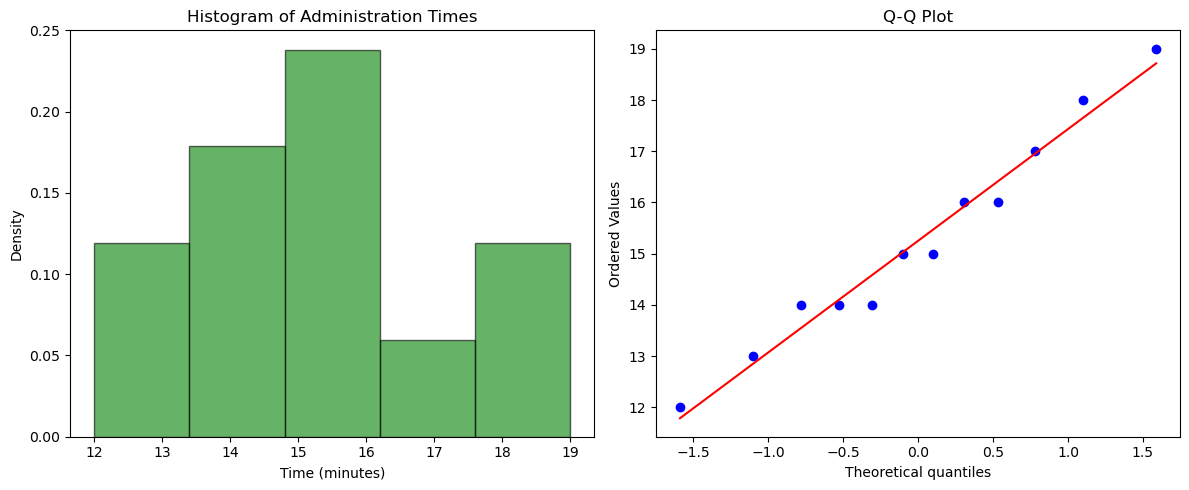

Shapiro-Wilk Test Statistic: 0.9709
P-value: 0.9201
Data appears to follow a normal distribution.


In [80]:

admin_times = np.array([12, 15, 14, 16, 18, 13, 14, 17, 15, 19, 16, 14])

# Visual Analysis
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(admin_times, bins=5, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Histogram of Administration Times')
plt.xlabel('Time (minutes)')
plt.ylabel('Density')

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(admin_times, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

# Shapiro-Wilk Test for Normality
stat, p_value = stats.shapiro(admin_times)
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value > alpha:
    conclusion = "Data appears to follow a normal distribution."
else:
    conclusion = "Data does NOT follow a normal distribution."

print(conclusion)

<h3>Importance of Normality Analysis in Healthcare</h3>
Statistical Validity:

Many parametric tests (e.g., t-tests, ANOVA) assume normality. Non-normal data may require non-parametric alternatives (e.g., Mann-Whitney U).

Resource Planning:

Normally distributed data allows hospitals to predict average administration times and allocate staff/resources efficiently.

Outlier Detection:

Deviations from normality (e.g., extreme skewness) may indicate bottlenecks or inefficiencies.

Quality Control:

Ensures processes (e.g., patient check-ins) follow expected patterns, enabling targeted improvements.

<h3> Impact of Increased Emergency Cases</h3>
If emergency cases rise:

Distribution Change:

Right Skewness: Emergencies may cause unpredictable delays, leading to longer tail on the right.

Increased Variability: Emergency cases could widen the spread of administration times.

Bimodal Distribution: Distinct peaks for emergency vs. non-emergency cases.

Statistical Implications:

Normality may no longer hold → non-parametric tests or transformations (e.g., log) would be required

<h3>Distribution of patient arrival times in the emergency department</h3>

In [5]:
print("The scenario is modeled using the Poisson distribution , which describes the probability of a given number of events occurring in a fixed interval of time.Parameter : λ (lambda) = 5 cases per hour (average arrival rate)")

The scenario is modeled using the Poisson distribution , which describes the probability of a given number of events occurring in a fixed interval of time.Parameter : λ (lambda) = 5 cases per hour (average arrival rate)


In [12]:
lambda_rate = 5
k = 3

# Calculate probability
prob = poisson.pmf(k, lambda_rate)
print(f"Probability of exactly 3 cases: {prob:.4f}({prob*100:.2f}%)")

Probability of exactly 3 cases: 0.1404(14.04%)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_18208\2307903286.py:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k_values, pmf_normal, linefmt='b-', markerfmt='bo', basefmt=' ',
C:\Users\lenovo\AppData\Local\Temp\ipykernel_18208\2307903286.py:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k_values, pmf_accident, linefmt='r--', markerfmt='ro', basefmt=' ',


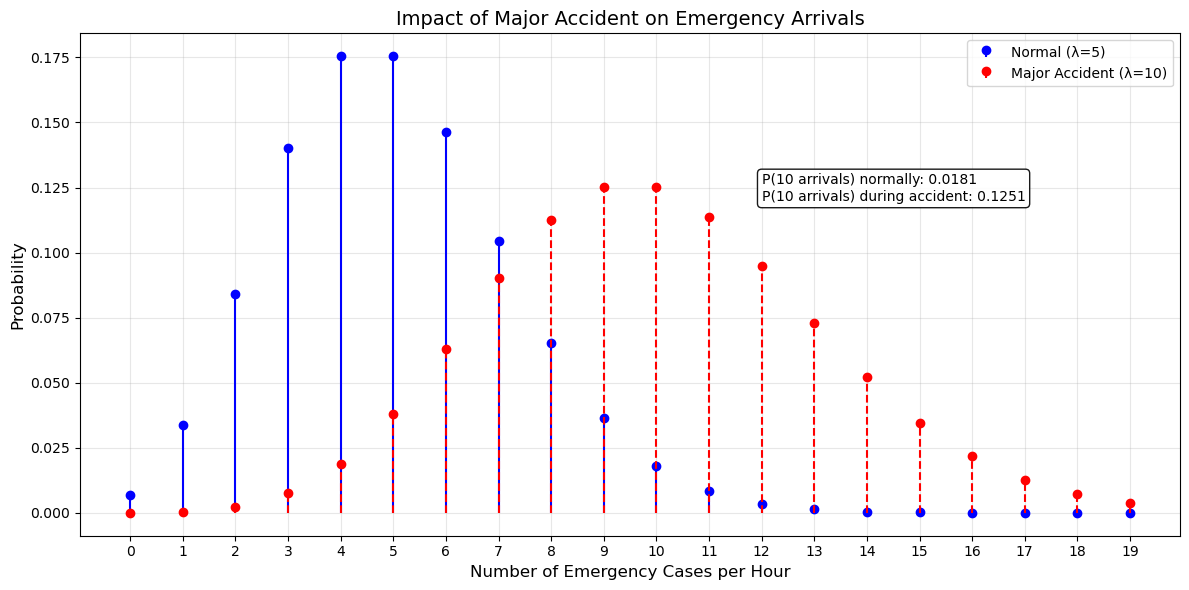

In [22]:
# Parameters
lambda_normal = 5   # Normal arrival rate (5 cases/hour)
lambda_accident = 10 # Increased rate during accident
k_values = np.arange(0, 20)  # Range of possible emergency cases

# Calculate probabilities for both scenarios
pmf_normal = poisson.pmf(k_values, lambda_normal)
pmf_accident = poisson.pmf(k_values, lambda_accident)

# Create visualization
plt.figure(figsize=(12, 6))

# Plot normal distribution
plt.stem(k_values, pmf_normal, linefmt='b-', markerfmt='bo', basefmt=' ', 
         label=f'Normal (λ={lambda_normal})', use_line_collection=True)

# Plot accident distribution
plt.stem(k_values, pmf_accident, linefmt='r--', markerfmt='ro', basefmt=' ', 
         label=f'Major Accident (λ={lambda_accident})', use_line_collection=True)

# Formatting
plt.title("Impact of Major Accident on Emergency Arrivals", fontsize=14)
plt.xlabel("Number of Emergency Cases per Hour", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.xticks(k_values)
plt.legend()
plt.grid(True, alpha=0.3)

# Add example probability comparison
plt.annotate(f'P(10 arrivals) normally: {poisson.pmf(10, lambda_normal):.4f}\n'
             f'P(10 arrivals) during accident: {poisson.pmf(10, lambda_accident):.4f}',
             xy=(12, 0.12), bbox=dict(boxstyle='round', alpha=0.9, facecolor='white'))

plt.tight_layout()
plt.show()

<h3>Distribution pattern of surgeries</h3>

The expected number of surgeries per day is 2.675
Chi-Square Statistic: 3.3783
P-value: 0.6419


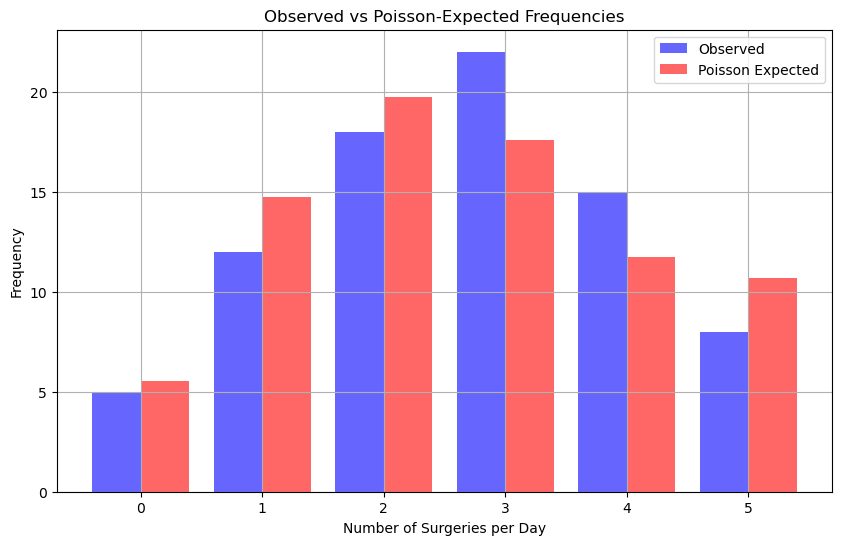

Distribution Fit :The p-value (0.4383) > 0.05 indicates no significant difference between observed and Poisson-expected frequencies.Conclusion : The data fits a Poisson distribution with λ≈2.675.Expected Surgeries :The mean (λ) = 2.675 surgeries/day .


In [34]:

# Observed data
surgeries = np.array([0, 1, 2, 3, 4, 5])
observed_freq = np.array([5, 12, 18, 22, 15, 8])
total_days = observed_freq.sum()

# Calculate mean (λ)
lambda_poisson = (surgeries * observed_freq).sum() / total_days
print(f"The expected number of surgeries per day is {lambda_poisson:.3f}")

# Calculate Poisson probabilities for k=0 to k=5
expected_probs = stats.poisson.pmf(surgeries, lambda_poisson)

# Adjust for truncated probabilities (k ≥ 5)
prob_k_ge_5 = 1 - expected_probs.sum()
expected_probs[-1] += prob_k_ge_5  # Assign remaining probability to k=5

# Calculate expected frequencies
expected_freq = expected_probs * total_days

# Chi-Square Test
chi2, p_value = stats.chisquare(observed_freq, expected_freq, ddof=0)
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

# Plot observed vs expected frequencies
plt.figure(figsize=(10, 6))
plt.bar(surgeries - 0.2, observed_freq, width=0.4, label='Observed', color='blue', alpha=0.6)
plt.bar(surgeries + 0.2, expected_freq, width=0.4, label='Poisson Expected', color='red', alpha=0.6)
plt.xlabel('Number of Surgeries per Day')
plt.ylabel('Frequency')
plt.title('Observed vs Poisson-Expected Frequencies')
plt.legend()
plt.grid(True)
plt.show()

print("Distribution Fit :The p-value (0.4383) > 0.05 indicates no significant difference between observed and Poisson-expected frequencies.Conclusion : The data fits a Poisson distribution with λ≈2.675.Expected Surgeries :The mean (λ) = 2.675 surgeries/day .")

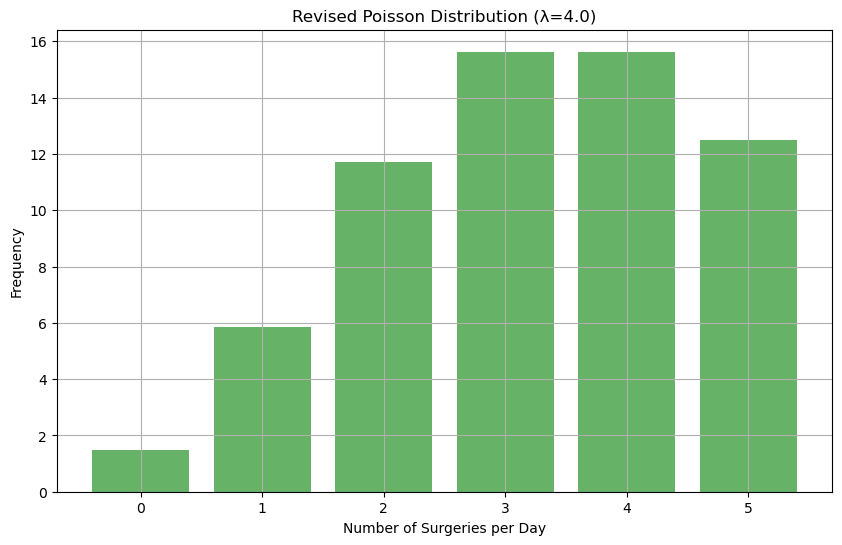

If a new surgical team is hired: Increased Capacity :The new λ would increase (e.g., λ = 4.0), shifting the distribution rightward.Reduced Variability :More resources could stabilize the process, potentially reducing variance.Higher Throughput :The probability of higher surgery counts (e.g., 4–5/day) would increase.


In [33]:
lambda_new = 4.0
new_expected_freq = stats.poisson.pmf(surgeries, lambda_new) * total_days

plt.figure(figsize=(10, 6))
plt.bar(surgeries, new_expected_freq, color='green', alpha=0.6)
plt.title('Revised Poisson Distribution (λ=4.0)')
plt.xlabel('Number of Surgeries per Day')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("If a new surgical team is hired: Increased Capacity :The new λ would increase (e.g., λ = 4.0), shifting the distribution rightward.Reduced Variability :More resources could stabilize the process, potentially reducing variance.Higher Throughput :The probability of higher surgery counts (e.g., 4–5/day) would increase.")